In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from numpy import maximum,minimum
# plt.rcParams['font.sans-serif'] = ['SimHei']

In [7]:
# 读取图像
image = Image.open('output222transed.jpg').convert('L')
print(image.size)

(3818, 3036)


In [8]:
image_array = np.array(image)
non_zero_indices = np.where(image_array > 0)
shift_distance = image.size[0]//7

left_limit = 0
right_limit = image.size[0]-1

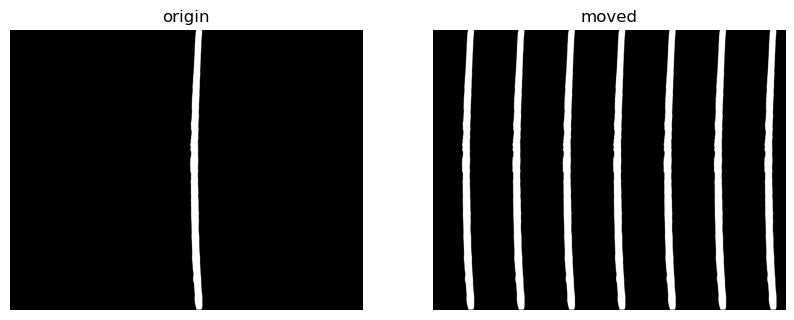

In [9]:
# 左右移动非零部分的坐标
non_zero_indices_l = (non_zero_indices[0], maximum(non_zero_indices[1] - shift_distance,0))
non_zero_indices_ll = (non_zero_indices[0], maximum(non_zero_indices[1] - 2*shift_distance,0))
non_zero_indices_lll =(non_zero_indices[0], maximum(non_zero_indices[1] - 3*shift_distance,0))

non_zero_indices_r = (non_zero_indices[0], minimum(non_zero_indices[1] + shift_distance,right_limit))
non_zero_indices_rr = (non_zero_indices[0], minimum(non_zero_indices[1] + 2*shift_distance,right_limit))
non_zero_indices_rrr = (non_zero_indices[0], minimum(non_zero_indices[1] + 3*shift_distance,right_limit))

moved_image_array = np.zeros_like(image_array)
moved_image_array[non_zero_indices_l] = image_array[non_zero_indices]
moved_image_array[non_zero_indices_r] = image_array[non_zero_indices]
moved_image_array[non_zero_indices_ll] = image_array[non_zero_indices]
moved_image_array[non_zero_indices_rr] = image_array[non_zero_indices]
moved_image_array[non_zero_indices] = image_array[non_zero_indices]
moved_image_array[non_zero_indices_lll] = image_array[non_zero_indices] 
moved_image_array[non_zero_indices_rrr] = image_array[non_zero_indices]
moved_image = Image.fromarray(moved_image_array)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('origin')
plt.axis('off')

plt.subplot(122)
plt.imshow(moved_image, cmap='gray')
plt.title('moved')
plt.axis('off')

plt.show()


In [10]:
moved_image.save("mask222transed.png")